# Python Coursework - JuPyter Notebook
## Deadline : 14/12/2018 12:00pm
### zq008603, 24008603 - student username and number

In [2]:
import pandas as pd
%matplotlib inline
import scipy
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu
import seaborn as sb
from scipy.stats import norm
from scipy.stats import chisquare
import statistics
from scipy.stats import ttest_ind
from scipy import stats
import warnings
from scipy.stats import chi2
import datetime
import calendar
from sklearn.mixture import GaussianMixture 
from collections import Counter
from itertools import groupby
import networkx as nx
from operator import itemgetter


bikeData = pd.read_csv("metro.csv")

### Load the metro.csv file into a pandas data frame.


In [3]:
bikeData.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type
0,94851140,8,2018-07-01 00:04:00,2018-07-01 00:12:00,3058,34.035801,-118.233170,3082,34.046520,-118.237411,6279,30,One Way,Monthly Pass
1,94851141,8,2018-07-01 00:04:00,2018-07-01 00:12:00,3058,34.035801,-118.233170,3082,34.046520,-118.237411,6518,365,One Way,Flex Pass
2,94851138,15,2018-07-01 00:09:00,2018-07-01 00:24:00,4147,34.145248,-118.150070,4174,34.165291,-118.150970,4823,365,One Way,Monthly Pass
3,94851137,7,2018-07-01 00:22:00,2018-07-01 00:29:00,4157,34.140999,-118.132088,4162,34.147499,-118.148010,6115,30,One Way,Monthly Pass
4,94851136,35,2018-07-01 00:23:00,2018-07-01 00:58:00,3013,33.779819,-118.263023,3013,33.779819,-118.263023,12055,1,Round Trip,Walk-up


### Find a sensible way to remove the missing values from the data frame, and explain why you have chosen this method.


In [4]:
bikeData.isnull().any()

trip_id                False
duration               False
start_time             False
end_time               False
start_station          False
start_lat               True
start_lon               True
end_station            False
end_lat                 True
end_lon                 True
bike_id                False
plan_duration          False
trip_route_category    False
passholder_type        False
dtype: bool

<div class="alert alert-block alert-info">
<b>Null's found:</b> There are NaN's present in the start_lat, start_lon, end_lat and end_lon columns.
</div>

In [5]:
#counting null 
#source [1]
nullColumns = bikeData.columns[bikeData.isnull().any()]
bikeData[nullColumns].isnull().sum()

start_lat     559
start_lon     559
end_lat      1838
end_lon      1838
dtype: int64

In [6]:
#dropna drops rows with missing values from the data frame
bikeDataNoNull = bikeData.dropna()
bikeDataNoNull.isnull().any()

trip_id                False
duration               False
start_time             False
end_time               False
start_station          False
start_lat              False
start_lon              False
end_station            False
end_lat                False
end_lon                False
bike_id                False
plan_duration          False
trip_route_category    False
passholder_type        False
dtype: bool

<div class="alert alert-block alert-success">
<b>Null's Removed:</b> There are no longer any NaN's present in the dataset.
</div>

#### Choosing dropna()

Pandas have built in functions that allow for the handling of "missing" data. In this data set the missing data is represented by NaNs but NA(not available) is another valid representation. In order to clean the metro dataset the dropna() function was used. This excluded labels from the data set which referred to any missing data by determining the rows/columns which contains missing values and removing them. As is shown above there were null values in the data set in the start/end lon and lat columns. The dropna() function will remove rows that contain any NaNs/NA values which is what was needed in this case. The return value of the function is the dataframe minus the NaNs/NA entries which was then carried forward as the main dataframe for the remainder of the notebook.

 source [2]

### Explore the distribution of the duration variable. 
#### You should produce a plot visualising the distribution, and calculate and discuss briefly statistics of the variable.


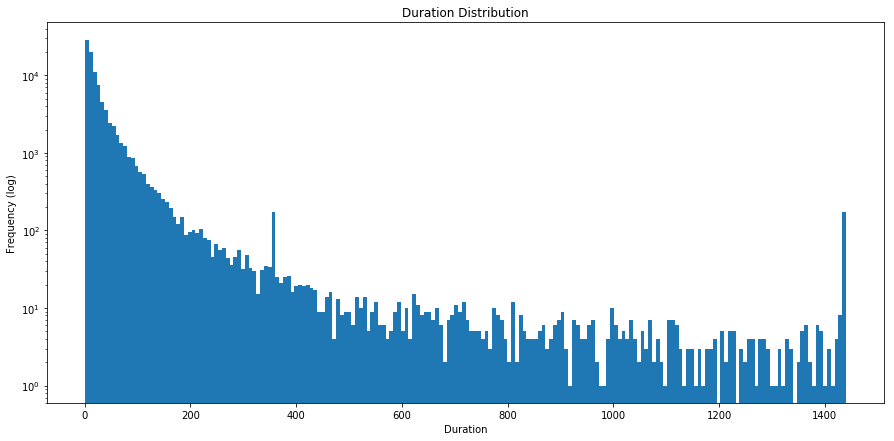

In [7]:
#bins - number of groups/bars
bikeDataNoNull['duration'].plot.hist(logy = True, bins = 200, figsize=[15,7])
plt.xlabel("Duration")
plt.ylabel("Frequency (log)")
plt.title('Duration Distribution');

In [8]:
bikeDataNoNull['duration'].describe()

count    93199.000000
mean        39.150903
std        106.635812
min          1.000000
25%          7.000000
50%         14.000000
75%         33.000000
max       1440.000000
Name: duration, dtype: float64

In [9]:
np.var(bikeDataNoNull['duration'])

11371.074407469756

#### Duration Variable Statistic Discussion

The mean duration of the journeys in the metro data set is 39 minutes  when rounded to an integer. This is being heavily influenced by outliers as the median shows that most journeys are under 14 minutes. This is a result of a skewed distribution which is also causing a high standard deviation. 


### Produce a plot showing how the distribution of duration relates to passholder type.


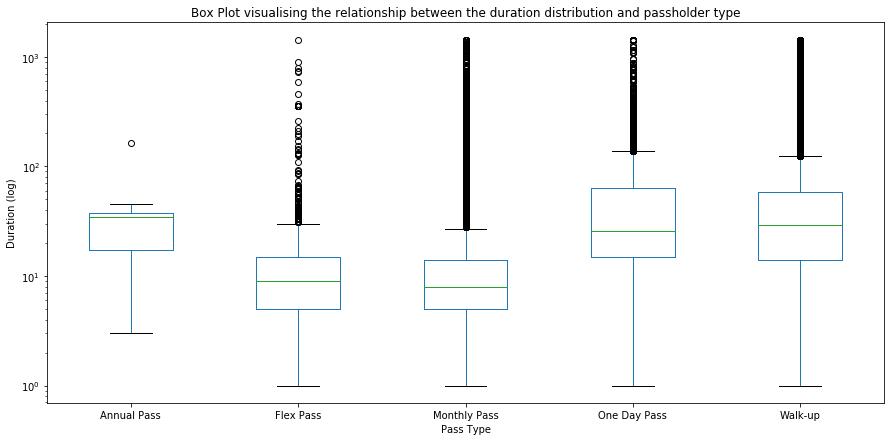

In [10]:
pivot = bikeDataNoNull.pivot_table(index='trip_id',columns='passholder_type',values='duration')
pivot.plot.box(logy = True, figsize=[15,7])
plt.xlabel("Pass Type")
plt.ylabel("Duration (log)")
plt.title('Box Plot visualising the relationship between the duration distribution and passholder type');

<div class="alert alert-block alert-info">
<b>Box Plot:</b> The above box plot effectively visualises the duration distribution for each passholder type.
</div>

### Perform an appropriate statistical test to check if the mean duration is different between One Day Pass and Flex Pass passholders. 
#### What assumptions have you made by using this test?


In [11]:
durationMean = bikeDataNoNull.groupby('passholder_type')['duration'].mean()
durationMean

passholder_type
Annual Pass     40.500000
Flex Pass       18.562580
Monthly Pass    15.830054
One Day Pass    66.518785
Walk-up         59.927580
Name: duration, dtype: float64

In [12]:
flex = bikeDataNoNull.groupby('passholder_type')['duration'].get_group('Flex Pass')
one = bikeDataNoNull.groupby('passholder_type')['duration'].get_group('One Day Pass')

In [13]:
passMean = bikeDataNoNull.groupby('passholder_type')['duration'].mean()
flexPass = round(passMean[1],2)
oneDay = round(passMean[3],2)

print("f:" + str(flexPass) + ", o:" + str(oneDay))




f:18.56, o:66.52


In [14]:
testST = ttest_ind(flex, one)
#test.statistic
testST.pvalue

7.9422977182875e-47

In [15]:
testST.statistic

-14.495319337859621

In [16]:
testMW = mannwhitneyu(flex, one)
testMW.pvalue

1.089459637342107e-298

In [17]:
testMW.statistic

1300630.5

<div class="alert alert-block alert-danger">
<b>Student T-Test:</b> 
The first test that was attempted to assess whether the mean duration of journeys for One Day Pass and Flex Pass passholders. 

Student T Test Assumptions:
1. X and Y approximately follow a normal distribution.
2. X and Y have the same variance.

As is evident from the duration distribution plot this variable does not follow a normal distribution and therefore this is not an appropriate test for this data. 
</div>

<div class="alert alert-block alert-success">
<b>Mann Whitney-U:</b> An appropriate test for this data is the Mann-Whitney U test as it is a non-parametric test: it does not assume the distribution is normal, therefor no assumptions are made. This test determines whether two independent samples have the same distribution.

The p-value that is returned by the Mann-Whitney U test is so small that it shows a high possibility that these two samples have the same distribution.
</div>

### Convert the start_time and end_time columns to date objects if they are not already.


In [18]:
bikeDataNoNull.dtypes

trip_id                  int64
duration                 int64
start_time              object
end_time                object
start_station            int64
start_lat              float64
start_lon              float64
end_station              int64
end_lat                float64
end_lon                float64
bike_id                  int64
plan_duration            int64
trip_route_category     object
passholder_type         object
dtype: object

<div class="alert alert-block alert-info">
<b>Before:</b> The start_time and end_time columns are object types.
</div>

In [44]:
bikeDataNoNull['end_time'] = pd.to_datetime(bikeDataNoNull['end_time'])
bikeDataNoNull['start_time'] = pd.to_datetime(bikeDataNoNull['start_time'])

In [20]:
bikeDataNoNull.dtypes

trip_id                         int64
duration                        int64
start_time             datetime64[ns]
end_time               datetime64[ns]
start_station                   int64
start_lat                     float64
start_lon                     float64
end_station                     int64
end_lat                       float64
end_lon                       float64
bike_id                         int64
plan_duration                   int64
trip_route_category            object
passholder_type                object
dtype: object

<div class="alert alert-block alert-success">
<b>After:</b> The start_time and end_time columns are now date time objects.
</div>

### Create a new column in the data frame that gives the hour of the day that each journey started on.


In [21]:
bikeDataNoNull = bikeDataNoNull.assign(start_hour=bikeDataNoNull.start_time.dt.hour)
bikeData1 = bikeDataNoNull[['trip_id','start_time','start_hour']]
bikeData1.head()

,trip_id,start_time,start_hour
0,94851140,2018-07-01 00:04:00,0
1,94851141,2018-07-01 00:04:00,0
2,94851138,2018-07-01 00:09:00,0
3,94851137,2018-07-01 00:22:00,0
4,94851136,2018-07-01 00:23:00,0


### Explore how the duration variable varies between each journey starting hour of the day, creating a plot to visualise this.


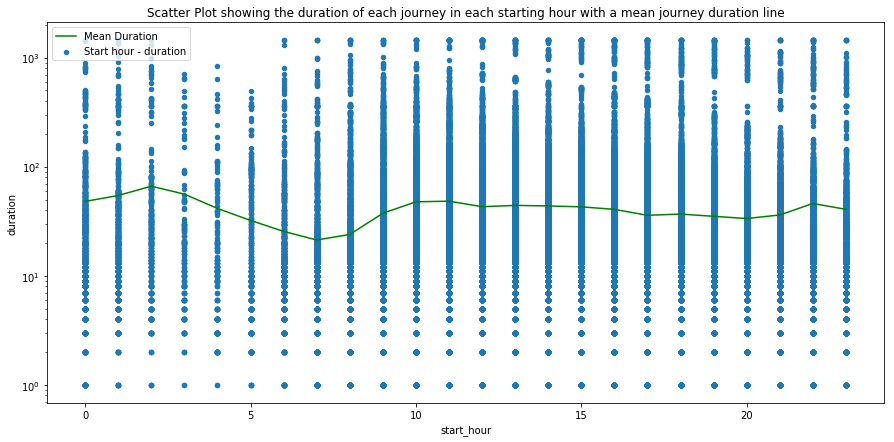

In [45]:
#source [3]
bikeData2 = bikeDataNoNull[['duration','start_hour']]
duration1 = bikeDataNoNull.groupby('start_hour')['duration'].mean()
bikeData2.plot.scatter(x='start_hour',y='duration', logy = True, label = 'Start hour - duration')
plt.rcParams["figure.figsize"] = [15, 7]
plt.plot( duration1,'g-', label = 'Mean Duration')
plt.legend(loc='best')
plt.title('Scatter Plot showing the duration of each journey in each starting hour with a mean journey duration line');

<div class="alert alert-block alert-info">
<b>Start hour and duration:</b> The plot above shows that the average duration of a journey is quite consistent across the possible start hours, dipping slightly between 5am and 10am.
</div>

In [23]:
np.var(duration1)

100.65421616436107

### Explore how the distribution of the duration variable varies between each day of the week, creating a plot to visualise this.


In [24]:
bikeDataNoNull = bikeDataNoNull.assign(weekday=bikeDataNoNull['start_time'].dt.day_name())


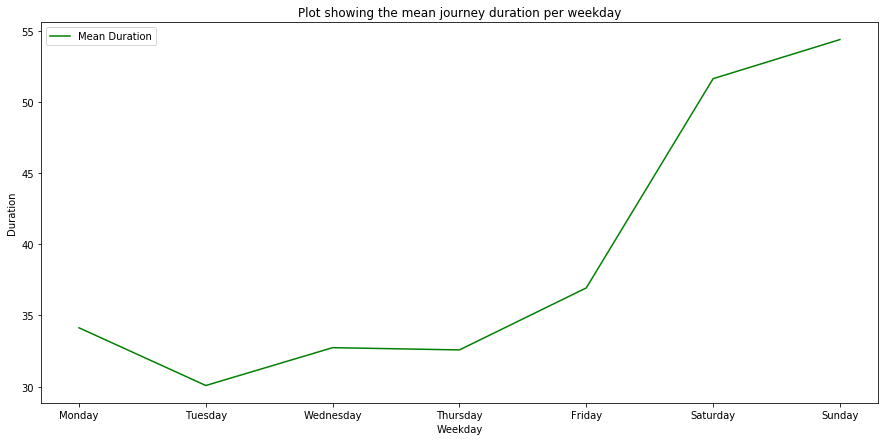

In [25]:
bikeData3 = bikeDataNoNull[['duration','weekday']]
day = bikeDataNoNull.groupby('weekday')['duration'].mean().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.rcParams["figure.figsize"] = [15, 7]
plt.plot( day,'g-', label = 'Mean Duration')
plt.legend(loc='best')
plt.xlabel("Weekday")
plt.ylabel("Duration")
plt.title('Plot showing the mean journey duration per weekday');

<div class="alert alert-block alert-info">
<b>Explore Distribution:</b> It is evident from the chart above that the longest journeys tend to take place on the weekends with shorter journeys taking place during the week. This data could suggest that weekday journeys tend to be commutes as they average around 30-40minutes whereas weekend journeys are for leisure purpoise as they average between 50-55minutes.
</div>


### Calculate the total numbers of passholders of each type travelling on each week day. 
#### Discuss the results.

In [26]:
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
passtype = ['Flex Pass','Monthly Pass','One Day Pass','Walk-up','Annual Pass']
grouped = bikeDataNoNull.groupby(['weekday','passholder_type'],as_index=False).size().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], level='weekday')
grouped

weekday    passholder_type
Monday     Flex Pass           216
           Monthly Pass       6818
           One Day Pass        538
           Walk-up            5235
Tuesday    Flex Pass           235
           Monthly Pass       7313
           One Day Pass        447
           Walk-up            4960
Wednesday  Flex Pass           234
           Monthly Pass       6958
           One Day Pass        566
           Walk-up            5236
Thursday   Flex Pass           244
           Monthly Pass       7150
           One Day Pass        404
           Walk-up            5432
Friday     Flex Pass           262
           Monthly Pass       6711
           One Day Pass        530
           Walk-up            6161
Saturday   Annual Pass           9
           Flex Pass           177
           Monthly Pass       4027
           One Day Pass        845
           Walk-up            8399
Sunday     Annual Pass           1
           Flex Pass           198
           Monthly Pass     

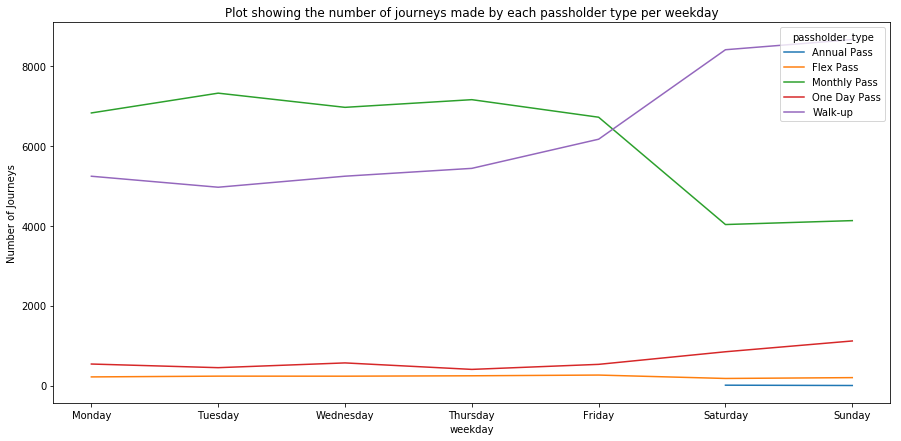

In [27]:
#source [4]
fig, ax = plt.subplots(figsize=(15,7))
#plt.ylim(0,8700)
x = np.array([0,1,2,3,4,5,6])
plt.xticks(x, week)
plt.ylabel("Number of Journeys")
plt.title('Plot showing the number of journeys made by each passholder type per weekday');
grouped.unstack().plot(ax=ax);

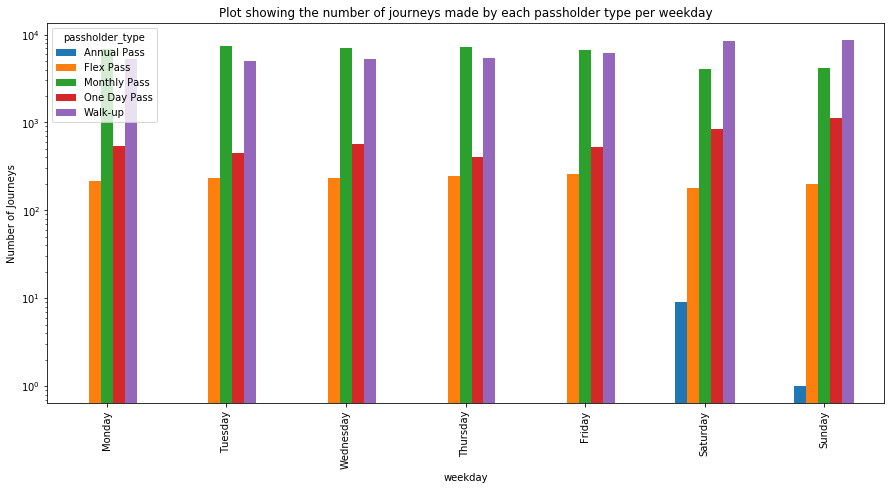

In [28]:
df = grouped.to_frame(name = 'size')
pivot2 = df.pivot_table(index='weekday',columns='passholder_type',values='size')
pivot2.plot.bar(logy=True,figsize = [15,7])
plt.ylabel("Number of Journeys")
plt.title('Plot showing the number of journeys made by each passholder type per weekday');

<div class="alert alert-block alert-warning">
<b>Y-Axis:</b> The above charts are plotting the same data however the Y-axis is different. The bar chart has log(y) values on the Y-axis to be able to see the Annual Passholder type more clearly whereas the line chart does not in order to visualise the spikes and dips in the number of journeys more clearly.
</div>

#### Discuss Results
We can see from the charts above that the number of journeys made by each passholder type on any given weekday varies.

Both Flex and One day pass holders tend to do the least amount of journeys consistently with Flex passholder jurney numbers rising on the weekend to spike on Sundays, whereas One day passholders stay at a consistent level throughout the week. Annual Passholders, surprisingly, do the least amount of journeys of all passholders and ride only on the weekend, mostly on Saturdays. When the y axis values are not in log form the Annual passholder journeys are so insignificant you cannot see them on the bar chart at all.

Walk-up passholders cycle at a consistent mid-level throughought the week with a major spike on the weekends. At the weekends it is walk-up passholders that complete the most journeys of any other passholder by roughly double. This pattern of use could suggest that the majority of walk-up passholders use the bikes for leisure purposes on the weekends with a consistent few using them to commute during the week.

Throughout the week monthly passholders complete a high number of journeys consistently dipping significantly on the weekend. This pattern of use suggests the monthly passholders use the bikes for commuting which is why we see that dip on weekends.

### Consider the data as a network of stations, with edges having weights corresponding to the total number of journeys made between them (at any time).
#### - Produce a visualisation of the network and discuss the output.
#### - Calculate statistics of the network, plot them where relevant, and discuss the results.

In [29]:
startEnd = bikeDataNoNull[['start_station','end_station']]
startEnd1 = startEnd.groupby(['start_station','end_station']).size()
tuples = [tuple(x) for x in startEnd.values]

In [30]:
startStation=bikeDataNoNull['start_station']
stations = []

for i in startStation:
    if i not in stations:
        stations.append(i)


In [31]:
G = nx.Graph()
#G.add_edges_from(tuples)

def addWeight(G,a,b):
    if G.has_edge(a,b):
        G[a][b]['weight'] += 1
    else:
        G.add_edge(a,b,weight=1)
      
startEnd[['start_station','end_station']].apply(lambda x: addWeight(G, x['start_station'], x['end_station']), axis=1)   

list(G.edges(data=True))


[(3058, 3082, {'weight': 257}),
 (3058, 3031, {'weight': 61}),
 (3058, 3022, {'weight': 163}),
 (3058, 3079, {'weight': 1}),
 (3058, 3006, {'weight': 17}),
 (3058, 3054, {'weight': 19}),
 (3058, 3010, {'weight': 56}),
 (3058, 3036, {'weight': 62}),
 (3058, 3048, {'weight': 77}),
 (3058, 3063, {'weight': 9}),
 (3058, 3005, {'weight': 66}),
 (3058, 3066, {'weight': 13}),
 (3058, 3045, {'weight': 7}),
 (3058, 3064, {'weight': 19}),
 (3058, 3042, {'weight': 56}),
 (3058, 3032, {'weight': 2}),
 (3058, 3055, {'weight': 14}),
 (3058, 3029, {'weight': 21}),
 (3058, 3030, {'weight': 15}),
 (3058, 3046, {'weight': 12}),
 (3058, 3035, {'weight': 8}),
 (3058, 3038, {'weight': 31}),
 (3058, 3058, {'weight': 88}),
 (3058, 3047, {'weight': 5}),
 (3058, 3068, {'weight': 12}),
 (3058, 3051, {'weight': 5}),
 (3058, 3075, {'weight': 8}),
 (3058, 3067, {'weight': 15}),
 (3058, 3008, {'weight': 9}),
 (3058, 3076, {'weight': 6}),
 (3058, 3052, {'weight': 1}),
 (3058, 3027, {'weight': 5}),
 (3058, 3014, {'we

<div class="alert alert-block alert-info">
<b>Code for Network with weighted Edges :</b> Due to the number of edges in the network having the weights plotted as well made it very difficult to read. The code has been retained below for future use.

<code>pos = nx.spring_layout(G)
plt.rcParams["figure.figsize"] = [15, 7]
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels, node_size=250,alpha=0.5)
plt.show()</code>
</div>

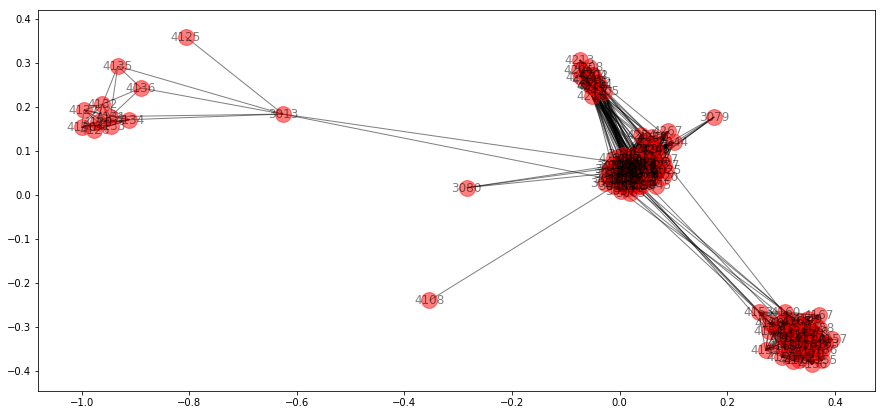

In [32]:
pos = nx.spring_layout(G)
plt.rcParams["figure.figsize"] = [15, 7]
nx.draw_networkx(G,layout=pos,node_size=250,alpha=0.5)

#### Plot Discussion

It is possible to see from the network graph that there are 4 clusters.
The largest central cluster is linked by many edges to the two other main clusters whereas the final cluster is linked to the main group by one station: 3013. There are a few outlier stations that are only connected to a few stations in the main group: 3079, 3080, 4108. The majority of the stations are very interconnected as they are clustered together with many edges between them all.

In [33]:
#source [5]
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 127
Number of edges: 2601
Average degree:  40.9606


In [34]:
nx.density(G)

0.3250843644544432

In [35]:
nx.transitivity(G)

0.8430635412059561

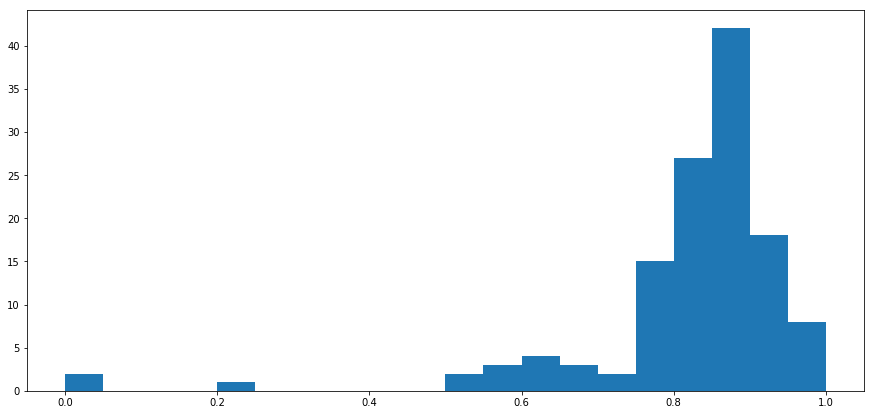

In [36]:
cc = nx.clustering(G)
plt.hist(list(cc.values()), bins = 20);

In [37]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

print("Top 5 nodes by degree:")
for d in sorted_degree[:5]:
    print(d)

    #top node is a hub

Top 5 nodes by degree:
(3005, 77)
(3007, 72)
(3008, 70)
(3006, 70)
(3035, 69)


In [38]:
eigenvector_dict = dict(nx.eigenvector_centrality(G))
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector_centrality')
sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)

print("Top 5 nodes by Eigen Vector:")
for d in sorted_eigenvector[:5]:
    print(d)
    
#the closer to 1 the greater the centrality

Top 5 nodes by Eigen Vector:
(3005, 0.14170890638924086)
(3007, 0.13972016036511628)
(3008, 0.13950395439095434)
(3006, 0.13904098488989766)
(3035, 0.1381072712648376)


In [39]:
betweenness_dict = nx.betweenness_centrality(G)
nx.set_node_attributes(G, betweenness_dict, 'betweenness')

sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 5 nodes by Betweenness Centrality:")
for d in sorted_betweenness[:5]:
    print(d)


Top 5 nodes by Betweenness Centrality:
(3013, 0.16198941798941802)
(3005, 0.128465383485538)
(3066, 0.09982253835198054)
(3016, 0.06572903571677007)
(3057, 0.052915061528220696)


#### Network Statistics Discussion

There are 127 nodes and 2601 edges in this network. Thst makes the average degree 40.96. Closely related to the average degree is the network density, 0.33, which shows that of all the potential connections 33% of them occur. The transitivity of this network is high, 0.83, suggesting that for all groups of 3 nodes that are possible 83% are connected to each other which supports the interpretation of the network graph; the majority of the networks nodes are interconnected. The clustering coefficent supports this interpretation of the transitivity as we can see that the majority of the data points fall between 0.75 and 1. This gives an overall sense that clustering is present in the network.

The 5 nodes with the most degrees are; 3005, 3007, 3008, 3006 and 3035. These are also the top 5 nodes based on Eigenector centrality suggesting that they are all hubs and are also connected to other hubs within the network. From a betweeness connectivity point of view the top 5 nodes are; 3013, 3005, 3066, 3016 and 3057. These are the stations that are broker nodes connecting the main clusters of nodes to the smaller clusters. It is possible to see 3013 working as a broker within the network from the network graph above.

source [5]

### Load the seeds.csv file into a pandas data frame.


In [40]:
seedData = pd.read_csv("seeds.csv")
seedData.head()

,area,perimeter,compactness,length,width,asymmetry,groove length
0,15.26,14.84,0.871,5.763,3.312,2.221,5.220
1,14.88,14.57,0.881,5.554,3.333,1.018,4.956
2,14.29,14.09,0.905,5.291,3.337,2.699,4.825
3,13.84,13.94,0.895,5.324,3.379,2.259,4.805
4,16.14,14.99,0.903,5.658,3.562,1.355,5.175


### Use scikitlearn to fit a Gaussian mixture model to the data, with 2 components.
#### Describe Gaussian mixture models and interpret the results.


#### Gaussian Mixture Models
The Gaussian or Normal ditribution is an example of a continuous parametric distribution with two parameters; mean and standard deviation. By modelling a mixture of Gaussian distributions we can deal with clustering problems as it allows us to work with a combination of distributions. It also allows for more flexible cluster shapes. By using this method it is possible to identify the presence of subsets with in the data. Furthermore, by clustering the data in this way there is typically no way of labelling which data belongs to what cluster. Through the predict function it is possible to estimate the probability of a data point being generated by a specific component in the mixture.

Initially, it is necessary to provide a number of mixure components. In the example below 2 components have been used. To determine the number of components it is usual to try different variations and then evaluate what is the best fit for the data. Furthermore, there are several covariance constraint options: spherical, diagonal, tied or full, which yield varied performances. 

Two advantages of the GMM are speed and the lack of bias in cluster sizes. Two disadvantages of GMM's are the difficulties estimating covariance when the mixtures are small and needing to feed it the ideal number of components, which must be discovered seperately.

sources [6,7,8]

In [41]:
mixtureModel = GaussianMixture(2)
fit = mixtureModel.fit(seedData) #expectation

predict = fit.predict(seedData) #maximization
#source [9]

### Generate a scatter plot of compactness against groove length, showing the resulting cluster membership.


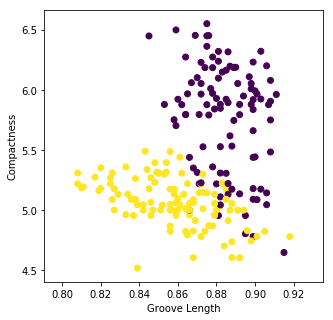

In [47]:
#MAKE IT SMALLER
plt.scatter(seedData['compactness'], seedData['groove length'], c = predict)
plt.rcParams["figure.figsize"] = [5, 5]
plt.ylabel("Compactness")
plt.xlabel("Groove Length")
plt.show()

#### GMM Results

By plotting compactness and groove length against the Gaussian Fit prediction two clusters become evident in the above model. 

The yellow cluster tends to have higher groove length and the purple cluster tends to have lower compactness. There does not seem to be any correlation in either cluster between  compactness and groove length.

source [10]

### Use an appropriate criterion (or several) to compare Gaussian mixture model clusterings with between 1 and 10 components. 
#### Discuss the results and suggest the number of clusters you would choose and why.

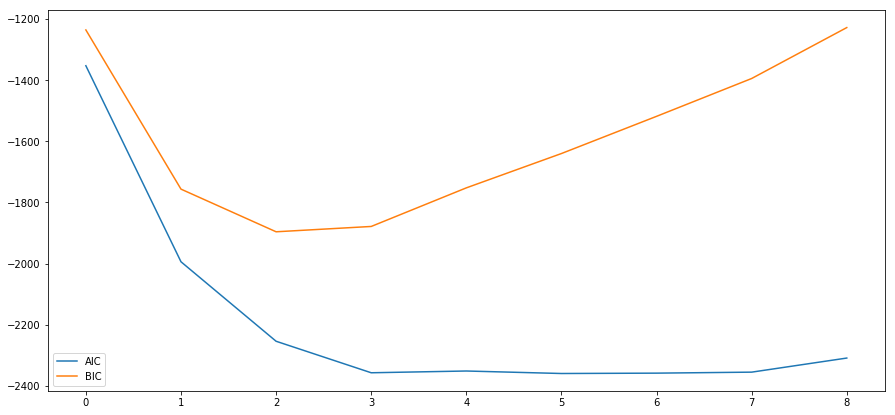

In [43]:
model_aic = []
model_bic = []

for i in range(1,10):
    mixtureModelb = GaussianMixture(i)
    mixtureModelb.fit(seedData)
    model_aic.append(mixtureModelb.aic(seedData))
    model_bic.append(mixtureModelb.bic(seedData))

plt.rcParams["figure.figsize"] = [15, 7]
plt.plot(model_aic, label = "AIC")
plt.plot(model_bic, label = "BIC")
plt.legend(loc='best');


#### Discuss Results

When following the AIC it seems that 6 would serve as the best choice for the number of clusters. 
 The BIC on the other hand suggests 2 clusters would be the best option. The final decision regarding clusters should be 2 as the BIC penalises more heavily for more complex models.


## Sources:


1. https://dzone.com/articles/pandas-find-rows-where-columnfield-is-null
2. https://pandas.pydata.org/pandas-docs/stable/missing_data.html
3. https://swcarpentry.github.io/python-novice-gapminder/09-plotting/
4. https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html
5. https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python
6. https://brilliant.org/wiki/gaussian-mixture-model/
7. https://www.kaggle.com/dhanyajothimani/basic-visualization-and-clustering-in-python
8. https://home.deib.polimi.it/matteucc/Clustering/tutorial_html/mixture.html
9. https://pythonmachinelearning.pro/clustering-with-gaussian-mixture-models/
10. https://www.khanacademy.org/math/cc-eighth-grade-math/cc-8th-data/cc-8th-interpreting-scatter-plots/a/clusters-in-scatter-plots
